# Multiple Linear Regression
## (With cost function and gradient descent for optimization)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

## Normalization

In [242]:
def normalize(x):
    """
    Normalizes a given dataset.

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors; n = features in each example/vector

    Returns:
    - x_norm: Normalized features matrix
    """
    x_min = np.min(x, axis=0)
    x_max = np.max(x, axis=0)
    x_norm = (x - x_min) / (x_max - x_min)
    
    return x_norm

## Variables declaration

In [252]:
# Característica 1: size (rango de 1000 a 3000)
size = np.random.randint(1000, 3001, 20)

# Característica 2: rooms (rango de 1 a 5)
rooms = np.random.randint(1, 6, 20)

# Característica 3: floor (rango de 1 a 3)
floor = np.random.randint(1, 4, 20)

# Característica 4: age (rango de 1 a 50)
age = np.random.randint(1, 51, 20)

# Crear la matriz x_train concatenando las características
x_train = np.column_stack((size, rooms, floor, age))
nx_train = normalize(x_train)
x_features = ["Size","Rooms", "Floors", "Age"]
y_train = (np.random.random(20) * 1000).round(2)
w = (np.random.random(4) * 1000).round(2)
b = np.random.random() * 1000
epochs = 1000
alpha = 0.00001
m,n = x_train.shape
print(x_features)
print("Features: ", nx_train.round(2))
print("Targets: ", y_train)
print("\nWeights: ", w)
print("Bias: ", b)
print("Learning Rate: ",alpha)
print("Matrix Size: ",m,"x",n)

['Size', 'Rooms', 'Floors', 'Age']
Features:  [[0.18 1.   1.   0.49]
 [0.23 0.25 0.   0.47]
 [0.02 0.75 0.5  0.88]
 [0.55 0.25 0.5  0.77]
 [0.96 0.   0.   0.28]
 [0.93 0.   0.5  0.28]
 [0.31 0.25 1.   0.91]
 [0.54 0.5  1.   0.33]
 [0.61 0.75 0.   1.  ]
 [0.68 1.   0.   0.4 ]
 [0.97 0.25 0.   0.58]
 [1.   1.   0.5  0.67]
 [0.15 0.75 0.   0.14]
 [0.08 0.75 1.   0.67]
 [0.11 0.   0.   0.77]
 [0.14 0.25 1.   0.72]
 [0.48 0.   1.   0.35]
 [0.   0.75 0.   0.53]
 [0.22 0.75 0.   0.  ]
 [0.39 1.   0.5  0.63]]
Targets:  [112.76 354.62 419.2  628.94 575.97 849.74 881.97 736.75 828.4   51.9
 893.5   37.84 398.7  312.51 727.57 466.01 833.   752.16 738.58 190.37]

Weights:  [723.84 832.7  533.76 598.23]
Bias:  327.4734547978713
Learning Rate:  1e-05
Matrix Size:  20 x 4


## Ploting the Dataset

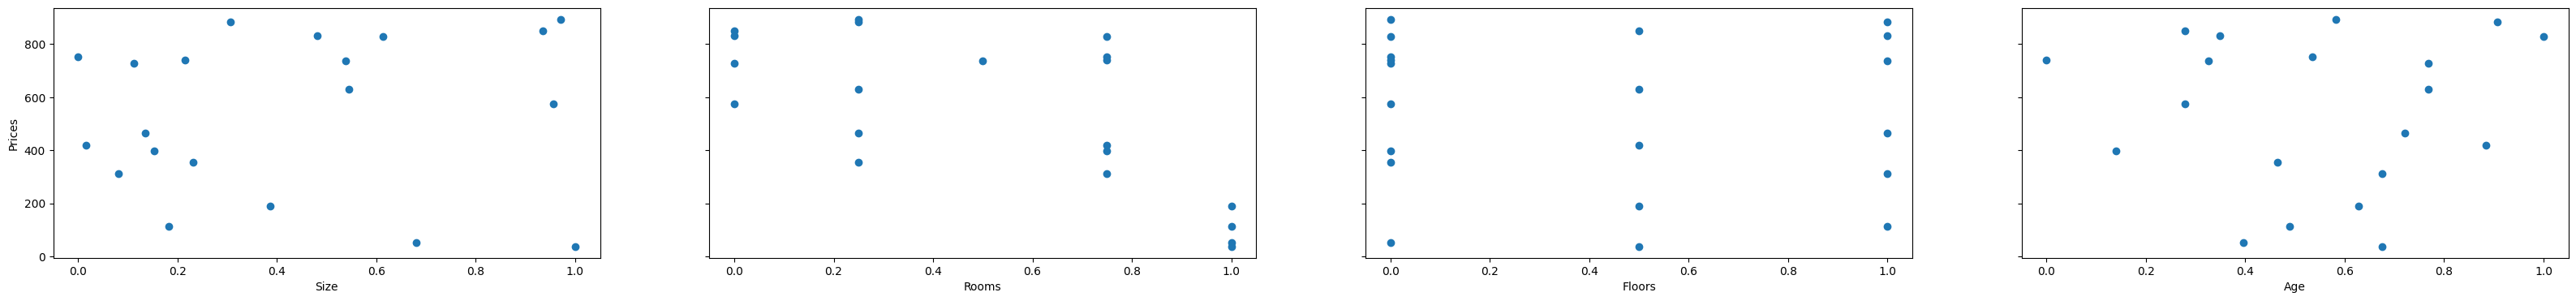

In [253]:
fig,ax = plt.subplots(1,n, figsize=(40,4),sharey=True)
for i in range(n):
    ax[i].scatter(nx_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
    #for j in range(m):
    #    ax[i].annotate(f"P{j}",(nx_train[j,i],y_train[j]),ha='center')
ax[0].set_ylabel("Prices")
plt.show()

## Linear Regression prediction

In [254]:
def multipleLR(x, w, b):
    # w = np.array[weight1, weight 2, weight 3....weight n]
    # x = np.array[[x1, x2, x3...xn]
    #              [x1.....xn]
    #              [x1.....xn]
    #              [x1.....xn]]
    # b = floatValue/Scalar
    p = np.dot(x, w)
    
    p += b
    
    return p  

[112.76 354.62 419.2  628.94 575.97 849.74 881.97 736.75 828.4   51.9
 893.5   37.84 398.7  312.51 727.57 466.01 833.   752.16 738.58 190.37]
[2117.7   981.29 1759.09 1656.46 1185.94 1437.42 1833.26 1862.18 1994.31
 1888.86 1586.52 2554.35 1145.91 1948.09  867.39 1598.82 1418.18 1271.98
 1107.85 2082.45]


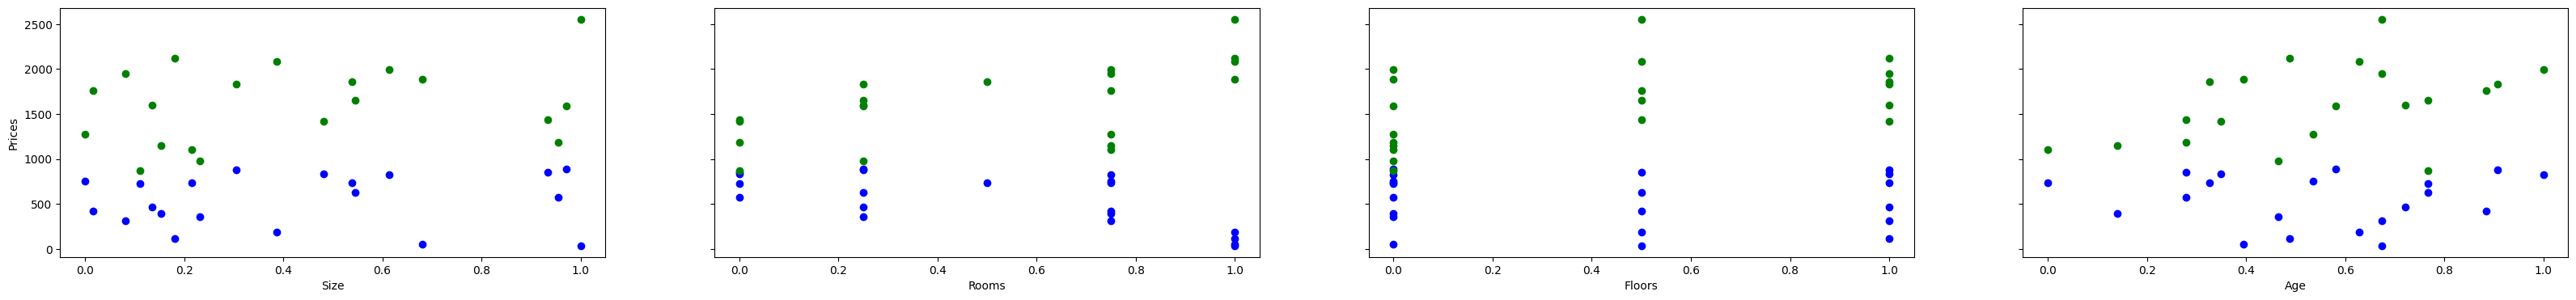

In [255]:
predicts = multipleLR(nx_train,w,b)
print(y_train)
print(predicts.round(2))

fig,ax = plt.subplots(1,n,figsize=(40,4),sharey=True)

for i in range(n):
    ax[i].scatter(nx_train[:,i],y_train,color="blue")
    ax[i].scatter(nx_train[:,i],predicts,color="green")
    ax[i].set_xlabel(x_features[i])
    
ax[0].set_ylabel("Prices")
plt.show()

## Cost Function
### Standard and Vectorized

In [256]:
def costFunction(x,y,w,b,m):
    # x = np.array[[x1,x2,x3...xn]
    #              [x1.....xn]
    #              [x1.....xn]
    #              [x1.....xn]]
    
    # y = np.array[y1.........yn]
    # w = np.array[weight1, weight 2, weight 3....weight n]
    # b = floatValue/Scalar
    # m = number of vectors in the matrix/training set
    
    cost_sum = 0.0
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
        
    cost_sum = (1 / (2 * m)) * cost_sum
    return cost_sum

def vectorizedCostFunction(x, y, w, b):
    """
    Calculates the cost for multiple linear regression

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors;   n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns_
    - normalized_cost
    """

    m = x.shape[0]

    # Calcular la predicción
    f_wb = np.dot(x, w) + b

    # Calcular el costo usando la fórmula del error cuadrático medio (MSE)
    cost = np.sum((f_wb - y) ** 2)
    normalized_cost = (1 / (2 * m)) * cost

    return normalized_cost

print("Standard Final Cost: ", costFunction(x_train,y_train,w,b,m))
print("Vectorized Final Cost: ", vectorizedCostFunction(x_train,y_train,w,b))

Standard Final Cost:  1047587798597.4417
Vectorized Final Cost:  1047587798597.4414


## Gradient Function

In [257]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw, dj_db



def gradientFunction(x,y,w,b):
    """
    Calculates the gradient for w and b

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors;   n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns_
    - w, b = gradients
    """
    m,n = x.shape
    aux_w = np.zeros((n,))
    aux_b = 0.
    
    for i in range(m):
        
        cost = (np.dot(x[i], w) + b) - y[i]
        
        for j in range(n):
            aux_w[j] = aux_w[j] + cost * x[i,j]
        aux_b += cost
    
    aux_w = aux_w / m
    aux_b = aux_b / m
    
    return aux_w,aux_b


def vectorizedGradientFunction(x, y, w, b):
    """
    Calculates the gradient for w and b using vectorized operations

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors; n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns:
    - dw, db = gradients
    """
    m, n = x.shape
    
    # Calcular la predicción
    f_wb = np.dot(x, w) + b
    
    # Calcular la diferencia entre la predicción y las etiquetas reales
    cost = f_wb - y
    
    # Calcular gradientes de w y b usando la vectorización de NumPy
    dw = (1 / m) * np.dot(x.T, cost)
    db = (1 / m) * np.sum(cost)
    
    return dw, db

i1_w, i1_b = vectorizedGradientFunction(x_train, y_train, w, b)
i2_w, i2_b = gradientFunction(x_train, y_train, w, b)
i3_w, i3_b = compute_gradient(x_train, y_train, w, b)

print("Correct w: ", i3_w)
print("Correct b: ", i3_b)
print("Standard w: ", i2_w)
print("Standard b: ", i2_b)
print("Vectorized w: ", i1_w)
print("Vectorized b: ", i1_b)


Correct w:  [2.86011139e+09 4.06368826e+06 2.48472524e+06 3.42771429e+07]
Correct b:  1376331.726454798
Standard w:  [2.86011139e+09 4.06368826e+06 2.48472524e+06 3.42771429e+07]
Standard b:  1376331.726454798
Vectorized w:  [2.86011139e+09 4.06368826e+06 2.48472524e+06 3.42771429e+07]
Vectorized b:  1376331.7264547981


## Gradient Descent

In [258]:
def GradientDescent(x,y,init_w,init_b,alpha,epochs):
    w = init_w
    b = init_b
    
    for i in range(epochs):
        aux_w,aux_b = gradientFunction(x,y,w,b)
        
        w = w - alpha * aux_w
        b = b - alpha * aux_b
        
        #Cost per Iteration:
        cost = vectorizedCostFunction(x,y,w,b)
        
        print(f"Epoch{i + 1} cost : {cost}\n weights:{w}\nBias:{b}")
        
    return w,b

print("Initial w: ", w)
print("Initial b: ", b)
alpha = 1.0e-1
epochs = 10000
aux_w,aux_b = GradientDescent(nx_train,y_train,w,b,alpha,epochs)
print("Final w: ",aux_w)
print("Final b: ",aux_b)
    
    





Initial w:  [723.84 832.7  533.76 598.23]
Initial b:  327.4734547978713
Epoch1 cost : 528752.3511123396
 weights:[674.92805798 761.42852601 478.17468472 535.22747277]
Bias:219.93568032157066
Epoch2 cost : 376572.45886417245
 weights:[635.67676425 702.4002234  433.06396414 484.84229816]
Bias:134.6756996138596
Epoch3 cost : 278027.85917488555
 weights:[604.17340697 653.22233555 396.36770856 444.584222  ]
Bias:67.29558661895756
Epoch4 cost : 214068.9794168236
 weights:[578.88242759 611.97343477 366.4317651  412.45382326]
Bias:14.264262379847672
Epoch5 cost : 172414.9803788592
 weights:[558.57108523 577.11053228 341.92794513 386.84577624]
Bias:-27.25335136642604
Epoch6 cost : 145148.6064828195
 weights:[542.24977181 547.39449558 321.78978123 366.47117864]
Bias:-59.53350671782103
Epoch7 cost : 127165.6652936339
 weights:[529.12409047 521.83016528 305.16094573 350.29518797]
Bias:-84.4037686009144
Epoch8 cost : 115175.45820852752
 weights:[518.55637879 499.61827403 291.35383529 337.48694896]


Epoch167 cost : 32694.19755789346
 weights:[ 275.7875473  -245.47573445   30.32082932  297.52321259]
Bias:351.35920548677035
Epoch168 cost : 32585.7343994134
 weights:[ 274.36814743 -247.33419532   29.61191513  297.13403992]
Bias:353.53960837758115
Epoch169 cost : 32478.480224658957
 weights:[ 272.9527826  -249.17712443   28.90787447  296.74215256]
Bias:355.7090656501953
Epoch170 cost : 32372.418898297983
 weights:[ 271.54148432 -251.00468249   28.20867092  296.34759309]
Bias:357.8676439183625
Epoch171 cost : 32267.534550831144
 weights:[ 270.13428306 -252.81702828   27.5142684   295.9504037 ]
Bias:360.01540926141854
Epoch172 cost : 32163.811573249266
 weights:[ 268.73120832 -254.61431868   26.82463113  295.55062616]
Bias:362.1524272299425
Epoch173 cost : 32061.23461181567
 weights:[ 267.33228864 -256.39670866   26.13972368  295.14830186]
Bias:364.2787628513405
Epoch174 cost : 31959.788562970214
 weights:[ 265.93755156 -258.16435138   25.45951089  294.7434718 ]
Bias:366.3944806353584
E

Epoch281 cost : 25462.81094313474
 weights:[ 142.88501161 -386.02402909  -26.14137276  243.65161469]
Bias:542.5486072717158
Epoch282 cost : 25428.87244876704
 weights:[ 141.97540441 -386.81139089  -26.47048568  243.14921507]
Bias:543.811077189309
Epoch283 cost : 25395.253304804104
 weights:[ 141.06990547 -387.59344181  -26.79743248  242.64700982]
Bias:545.0677475232883
Epoch284 cost : 25361.950202900895
 weights:[ 140.16850131 -388.37022647  -27.12222799  242.1450118 ]
Bias:546.3186480740106
Epoch285 cost : 25328.959873756146
 weights:[ 139.27117838 -389.14178904  -27.44488698  241.64323373]
Bias:547.5638084569604
Epoch286 cost : 25296.2790865721
 weights:[ 138.37792308 -389.90817324  -27.76542406  241.14168816]
Bias:548.8032581042335
Epoch287 cost : 25263.904648523174
 weights:[ 137.48872174 -390.66942233  -28.08385378  240.6403875 ]
Bias:550.0370262660061
Epoch288 cost : 25231.83340423335
 weights:[ 136.60356063 -391.42557914  -28.40019056  240.13934402]
Bias:551.2651420119884
Epoch2

Epoch452 cost : 22508.29083386561
 weights:[  35.67071195 -468.81460222  -60.19817745  167.10530553]
Bias:693.5038040162168
Epoch453 cost : 22500.8937453924
 weights:[  35.26595475 -469.09608572  -60.30751232  166.73428956]
Bias:694.0942426705498
Epoch454 cost : 22493.559468400483
 weights:[  34.86312509 -469.37604357  -60.41616409  166.36426089]
Bias:694.6821342070264
Epoch455 cost : 22486.287447945026
 weights:[  34.46221347 -469.65448545  -60.5241373   165.99521932]
Bias:695.267490228226
Epoch456 cost : 22479.077134295185
 weights:[  34.06321047 -469.93142094  -60.63143641  165.62716466]
Bias:695.8503222787259
Epoch457 cost : 22471.92798288073
 weights:[  33.66610668 -470.20685958  -60.73806589  165.26009665]
Bias:696.4306418454371
Epoch458 cost : 22464.83945423929
 weights:[  33.27089276 -470.48081081  -60.84403017  164.89401504]
Bias:697.0084603579384
Epoch459 cost : 22457.811013964107
 weights:[  32.87755939 -470.75328402  -60.94933363  164.52891953]
Bias:697.5837891888083
Epoch4

Epoch589 cost : 21904.705257434496
 weights:[  -5.23472158 -496.38639783  -70.34295572  125.10926479]
Bias:754.8231534795272
Epoch590 cost : 21902.35631807002
 weights:[  -5.44730316 -496.52538423  -70.39037848  124.86385061]
Bias:755.1523853495671
Epoch591 cost : 21900.026692287967
 weights:[  -5.6589063  -496.66368947  -70.43752164  124.61924371]
Bias:755.480233103197
Epoch592 cost : 21897.716218462134
 weights:[  -5.8695358  -496.80131726  -70.48438699  124.37544219]
Bias:755.8067027583061
Epoch593 cost : 21895.424736360146
 weights:[  -6.0791964  -496.93827134  -70.53097629  124.13244416]
Bias:756.1318003050819
Epoch594 cost : 21893.15208713085
 weights:[  -6.28789287 -497.07455537  -70.57729131  123.89024771]
Bias:756.4555317061496
Epoch595 cost : 21890.89811329186
 weights:[  -6.4956299  -497.21017301  -70.62333378  123.64885095]
Bias:756.777902896711
Epoch596 cost : 21888.66265871716
 weights:[  -6.70241218 -497.34512791  -70.66910543  123.40825196]
Bias:757.0989197846828
Epoch5

Epoch712 cost : 21722.154211374607
 weights:[ -25.2910325  -509.31826407  -74.52394527  100.39917496]
Bias:786.530414183723
Epoch713 cost : 21721.297295646415
 weights:[ -25.41275847 -509.39564162  -74.54735659  100.2386884 ]
Bias:786.7272839868486
Epoch714 cost : 21720.447338220663
 weights:[ -25.53394337 -509.47266191  -74.5706381   100.07877634]
Bias:786.9233380258482
Epoch715 cost : 21719.604282142987
 weights:[ -25.65458976 -509.54932672  -74.59379059   99.91943702]
Bias:787.1185797577205
Epoch716 cost : 21718.768070931892
 weights:[ -25.77470015 -509.62563783  -74.61681485   99.76066866]
Bias:787.3130126242384
Epoch717 cost : 21717.938648574716
 weights:[ -25.89427708 -509.70159702  -74.63971166   99.6024695 ]
Bias:787.5066400520205
Epoch718 cost : 21717.115959523595
 weights:[ -26.01332305 -509.77720605  -74.66248178   99.44483776]
Bias:787.6994654526025
Epoch719 cost : 21716.29994869157
 weights:[ -26.13184056 -509.85246668  -74.68512597   99.28777168]
Bias:787.8914922225067
Ep

Epoch811 cost : 21663.668721604558
 weights:[ -35.07290169 -515.49300545  -76.31834848   87.03217665]
Bias:802.5528890145216
Epoch812 cost : 21663.28563065895
 weights:[ -35.15163832 -515.54234557  -76.332038     86.92049092]
Bias:802.6836246257382
Epoch813 cost : 21662.90563576359
 weights:[ -35.23003326 -515.5914657   -76.34565543   86.80922088]
Bias:802.8138228096354
Epoch814 cost : 21662.528711794163
 weights:[ -35.30808807 -515.64036687  -76.35920118   86.69836512]
Bias:802.943485811709
Epoch815 cost : 21662.15483383173
 weights:[ -35.38580428 -515.68905014  -76.37267567   86.58792223]
Bias:803.0726158678028
Epoch816 cost : 21661.783977161067
 weights:[ -35.46318345 -515.73751654  -76.38607931   86.47789079]
Bias:803.201215204152
Epoch817 cost : 21661.41611726897
 weights:[ -35.5402271  -515.7857671   -76.39941251   86.3682694 ]
Bias:803.3292860374269
Epoch818 cost : 21661.051229842586
 weights:[ -35.61693677 -515.83380285  -76.41267568   86.25905665]
Bias:803.4568305747753
Epoch8

Epoch925 cost : 21635.05117230052
 weights:[ -42.17711291 -519.92043776  -77.49961733   76.66139791]
Bias:814.4765995707058
Epoch926 cost : 21634.899064438552
 weights:[ -42.22533737 -519.95031803  -77.50724379   76.58886002]
Bias:814.5584727857959
Epoch927 cost : 21634.748182612682
 weights:[ -42.27335705 -519.98006901  -77.5148323    76.51659982]
Bias:814.6400115928636
Epoch928 cost : 21634.598516922022
 weights:[ -42.32117284 -520.00969127  -77.52238309   76.44461629]
Bias:814.7212173731717
Epoch929 cost : 21634.45005754597
 weights:[ -42.36878565 -520.0391854   -77.52989634   76.37290844]
Bias:814.8020915021633
Epoch930 cost : 21634.30279474347
 weights:[ -42.41619637 -520.06855199  -77.53737227   76.30147526]
Bias:814.8826353494871
Epoch931 cost : 21634.156718852388
 weights:[ -42.4634059  -520.09779161  -77.54481107   76.23031574]
Bias:814.9628502790234
Epoch932 cost : 21634.011820288895
 weights:[ -42.51041511 -520.12690484  -77.55221296   76.1594289 ]
Bias:815.0427376489083
Epo

Epoch1054 cost : 21622.820935711512
 weights:[ -46.98179853 -522.88513266  -78.23076191   69.27749237]
Bias:822.7024297743077
Epoch1055 cost : 21622.767344729768
 weights:[ -47.00979285 -522.90233062  -78.2348438    69.23349625]
Bias:822.7507842366587
Epoch1056 cost : 21622.71418514065
 weights:[ -47.03767039 -522.91945592  -78.23890651   69.18967187]
Bias:822.7989421510322
Epoch1057 cost : 21622.661453468885
 weights:[ -47.06543164 -522.93650888  -78.24295012   69.14601856]
Bias:822.8469043221962
Epoch1058 cost : 21622.60914626722
 weights:[ -47.09307709 -522.95348982  -78.24697474   69.10253569]
Bias:822.8946715515805
Epoch1059 cost : 21622.55726011622
 weights:[ -47.12060724 -522.97039905  -78.25098046   69.05922261]
Bias:822.94224463729
Epoch1060 cost : 21622.505791624026
 weights:[ -47.14802259 -522.98723688  -78.25496738   69.01607867]
Bias:822.9896243741193
Epoch1061 cost : 21622.454737426153
 weights:[ -47.17532363 -523.00400362  -78.25893559   68.97310323]
Bias:823.03681155356

Epoch1161 cost : 21618.9668892637
 weights:[ -49.40367496 -524.36950422  -78.57561121   65.42588586]
Bias:826.9056395451761
Epoch1162 cost : 21618.944315111927
 weights:[ -49.4216157  -524.38047309  -78.57810109   65.39699986]
Bias:826.9369315307605
Epoch1163 cost : 21618.92192258913
 weights:[ -49.43948235 -524.39139625  -78.58057972   65.36822778]
Bias:826.9680966641807
Epoch1164 cost : 21618.899710233378
 weights:[ -49.45727524 -524.4022739   -78.58304713   65.33956916]
Bias:826.9991354622997
Epoch1165 cost : 21618.87767659456
 weights:[ -49.47499466 -524.41310624  -78.5855034    65.31102358]
Bias:827.030048439855
Epoch1166 cost : 21618.85582023421
 weights:[ -49.49264094 -524.42389347  -78.58794856   65.28259058]
Bias:827.0608361094676
Epoch1167 cost : 21618.834139725466
 weights:[ -49.51021438 -524.43463577  -78.59038268   65.25426974]
Bias:827.0914989816505
Epoch1168 cost : 21618.812633652953
 weights:[ -49.52771528 -524.44533334  -78.59280581   65.22606062]
Bias:827.122037564817

Epoch1292 cost : 21617.134857769142
 weights:[ -51.22308614 -525.4797259   -78.82293112   62.46809521]
Bias:830.0915098350582
Epoch1293 cost : 21617.12702207717
 weights:[ -51.23354585 -525.48609549  -78.82432159   62.45091922]
Bias:830.109900756612
Epoch1294 cost : 21617.11924941389
 weights:[ -51.24396274 -525.49243886  -78.82570598   62.4338115 ]
Bias:830.1282172884828
Epoch1295 cost : 21617.111539272242
 weights:[ -51.25433698 -525.4987561   -78.82708435   62.41677179]
Bias:830.1464597325552
Epoch1296 cost : 21617.10389114925
 weights:[ -51.26466877 -525.50504734  -78.82845671   62.39979983]
Bias:830.1646283894812
Epoch1297 cost : 21617.096304545965
 weights:[ -51.27495827 -525.51131268  -78.82982309   62.38289534]
Bias:830.1827235586857
Epoch1298 cost : 21617.088778967474
 weights:[ -51.28520566 -525.51755224  -78.83118351   62.36605807]
Bias:830.2007455383712
Epoch1299 cost : 21617.081313922823
 weights:[ -51.29541112 -525.5237661   -78.83253801   62.34928774]
Bias:830.2186946255

Epoch1530 cost : 21616.30320264239
 weights:[ -52.81778516 -526.44897644  -79.03041461   59.8247279 ]
Bias:832.9062691767837
Epoch1531 cost : 21616.30205616165
 weights:[ -52.8217446  -526.45137804  -79.03091784   59.81809939]
Bias:832.913286611526
Epoch1532 cost : 21616.300918901663
 weights:[ -52.82568798 -526.45376987  -79.03141896   59.81149744]
Bias:832.9202757227451
Epoch1533 cost : 21616.299790788267
 weights:[ -52.82961535 -526.45615197  -79.03191799   59.80492194]
Bias:832.9272366249248
Epoch1534 cost : 21616.298671747893
 weights:[ -52.83352679 -526.45852437  -79.03241493   59.79837278]
Bias:832.9341694320851
Epoch1535 cost : 21616.297561707568
 weights:[ -52.83742236 -526.46088713  -79.03290979   59.79184985]
Bias:832.9410742577837
Epoch1536 cost : 21616.29646059491
 weights:[ -52.84130212 -526.46324027  -79.03340258   59.78535306]
Bias:832.9479512151182
Epoch1537 cost : 21616.295368338102
 weights:[ -52.84516614 -526.46558384  -79.03389332   59.77888229]
Bias:832.9548004167

Epoch1690 cost : 21616.199812540097
 weights:[ -53.2845881  -526.73193064  -79.0892948    59.04079633]
Bias:833.7346781319785
Epoch1691 cost : 21616.199497581223
 weights:[ -53.28665612 -526.73318332  -79.08955357   59.03731196]
Bias:833.7383531525373
Epoch1692 cost : 21616.199185155398
 weights:[ -53.28871578 -526.73443093  -79.08981128   59.03384159]
Bias:833.7420133508197
Epoch1693 cost : 21616.198875242248
 weights:[ -53.29076711 -526.73567348  -79.09006792   59.03038516]
Bias:833.7456587866573
Epoch1694 cost : 21616.198567821568
 weights:[ -53.29281013 -526.73691099  -79.0903235    59.0269426 ]
Bias:833.74928951964
Epoch1695 cost : 21616.19826287331
 weights:[ -53.29484489 -526.7381435   -79.09057803   59.02351387]
Bias:833.7529056091169
Epoch1696 cost : 21616.197960377587
 weights:[ -53.29687142 -526.739371    -79.09083152   59.02009891]
Bias:833.7565071141969
Epoch1697 cost : 21616.197660314676
 weights:[ -53.29888975 -526.74059354  -79.09108396   59.01669767]
Bias:833.760094093

Epoch1790 cost : 21616.17811571712
 weights:[ -53.45496439 -526.83510712  -79.11054857   58.7533762 ]
Bias:834.0376055355323
Epoch1791 cost : 21616.17797525389
 weights:[ -53.45634353 -526.83594207  -79.11072007   58.75104662]
Bias:834.0400589453774
Epoch1792 cost : 21616.17783592033
 weights:[ -53.45771709 -526.83677364  -79.11089086   58.74872642]
Bias:834.0425024628368
Epoch1793 cost : 21616.17769770735
 weights:[ -53.4590851  -526.83760185  -79.11106095   58.74641554]
Bias:834.044936127821
Epoch1794 cost : 21616.17756060594
 weights:[ -53.46044758 -526.83842671  -79.11123034   58.74411395]
Bias:834.0473599800794
Epoch1795 cost : 21616.177424607158
 weights:[ -53.46180456 -526.83924823  -79.11139904   58.74182161]
Bias:834.049774059201
Epoch1796 cost : 21616.17728970213
 weights:[ -53.46315605 -526.84006642  -79.11156705   58.73953849]
Bias:834.0521784046148
Epoch1797 cost : 21616.177155882066
 weights:[ -53.46450208 -526.84088131  -79.11173438   58.73726454]
Bias:834.0545730555904


Epoch1929 cost : 21616.16633524397
 weights:[ -53.60187183 -526.92402571  -79.12876418   58.50494189]
Bias:834.2990718226239
Epoch1930 cost : 21616.166289524197
 weights:[ -53.60265764 -526.92450122  -79.12886132   58.50361142]
Bias:834.3004711114789
Epoch1931 cost : 21616.16624417212
 weights:[ -53.60344028 -526.92497481  -79.12895807   58.5022863 ]
Bias:834.3018647597563
Epoch1932 cost : 21616.16619918479
 weights:[ -53.60421977 -526.92544648  -79.12905443   58.50096652]
Bias:834.3032527902017
Epoch1933 cost : 21616.16615455926
 weights:[ -53.6049961  -526.92591625  -79.1291504    58.49965204]
Bias:834.3046352254688
Epoch1934 cost : 21616.166110292623
 weights:[ -53.6057693  -526.92638412  -79.12924597   58.49834285]
Bias:834.3060120881203
Epoch1935 cost : 21616.166066382
 weights:[ -53.60653938 -526.92685011  -79.12934116   58.49703893]
Bias:834.3073834006274
Epoch1936 cost : 21616.166022824524
 weights:[ -53.60730635 -526.92731421  -79.12943595   58.49574026]
Bias:834.308749185371


Epoch2123 cost : 21616.161837211854
 weights:[ -53.70773434 -526.98807272  -79.1418218    58.32554219]
Bias:834.4876516851398
Epoch2124 cost : 21616.161827667034
 weights:[ -53.70809302 -526.98828967  -79.14186593   58.32493378]
Bias:834.4882908801842
Epoch2125 cost : 21616.161818198976
 weights:[ -53.70845026 -526.98850576  -79.14190989   58.32432781]
Bias:834.4889274991519
Epoch2126 cost : 21616.161808807065
 weights:[ -53.70880605 -526.98872097  -79.14195367   58.32372429]
Bias:834.489561552427
Epoch2127 cost : 21616.161799490685
 weights:[ -53.70916041 -526.98893531  -79.14199727   58.32312319]
Bias:834.4901930503513
Epoch2128 cost : 21616.161790249233
 weights:[ -53.70951334 -526.98914879  -79.1420407    58.32252452]
Bias:834.4908220032255
Epoch2129 cost : 21616.1617810821
 weights:[ -53.70986484 -526.98936141  -79.14208395   58.32192826]
Bias:834.4914484213084
Epoch2130 cost : 21616.1617719887
 weights:[ -53.71021493 -526.98957317  -79.14212702   58.32133439]
Bias:834.49207231481

Epoch2260 cost : 21616.161042987686
 weights:[ -53.74554646 -527.0109428   -79.14647045   58.26138023]
Bias:834.5550457217433
Epoch2261 cost : 21616.16103983032
 weights:[ -53.74575267 -527.01106752  -79.14649578   58.26103019]
Bias:834.5554133170613
Epoch2262 cost : 21616.16103669835
 weights:[ -53.74595805 -527.01119173  -79.14652101   58.26068156]
Bias:834.5557794310228
Epoch2263 cost : 21616.16103359157
 weights:[ -53.7461626  -527.01131544  -79.14654613   58.26033433]
Bias:834.5561440695983
Epoch2264 cost : 21616.16103050977
 weights:[ -53.74636633 -527.01143865  -79.14657115   58.2599885 ]
Bias:834.5565072387341
Epoch2265 cost : 21616.161027452763
 weights:[ -53.74656923 -527.01156136  -79.14659607   58.25964406]
Bias:834.5568689443523
Epoch2266 cost : 21616.16102442034
 weights:[ -53.74677132 -527.01168358  -79.14662089   58.25930101]
Bias:834.5572291923515
Epoch2267 cost : 21616.1610214123
 weights:[ -53.74697259 -527.01180531  -79.14664561   58.25895935]
Bias:834.5575879886064

Epoch2365 cost : 21616.160818555
 weights:[ -53.76322824 -527.02163611  -79.14864124   58.23136011]
Bias:834.5865679527453
Epoch2366 cost : 21616.160817202614
 weights:[ -53.76336317 -527.02171771  -79.1486578    58.23113098]
Bias:834.5868085205727
Epoch2367 cost : 21616.160815861094
 weights:[ -53.76349756 -527.02179898  -79.14867429   58.23090277]
Bias:834.5870481189864
Epoch2368 cost : 21616.16081453037
 weights:[ -53.7636314  -527.02187992  -79.14869071   58.23067548]
Bias:834.5872867518932
Epoch2369 cost : 21616.16081321035
 weights:[ -53.76376471 -527.02196054  -79.14870707   58.23044911]
Bias:834.587524423184
Epoch2370 cost : 21616.160811900943
 weights:[ -53.76389748 -527.02204083  -79.14872336   58.23022365]
Bias:834.5877611367343
Epoch2371 cost : 21616.160810602072
 weights:[ -53.76402971 -527.0221208   -79.14873959   58.2299991 ]
Bias:834.5879968964036
Epoch2372 cost : 21616.16080931364
 weights:[ -53.76416141 -527.02220044  -79.14875575   58.22977545]
Bias:834.5882317060363

Epoch2554 cost : 21616.16068694964
 weights:[ -53.78110093 -527.032444    -79.15083334   58.20100424]
Bias:834.6184356339323
Epoch2555 cost : 21616.160686655672
 weights:[ -53.78116382 -527.03248203  -79.15084105   58.20089739]
Bias:834.6185477877366
Epoch2556 cost : 21616.160686364066
 weights:[ -53.78122646 -527.03251991  -79.15084873   58.20079097]
Bias:834.6186594896162
Epoch2557 cost : 21616.160686074807
 weights:[ -53.78128885 -527.03255764  -79.15085638   58.20068499]
Bias:834.6187707413925
Epoch2558 cost : 21616.16068578788
 weights:[ -53.78135099 -527.03259521  -79.150864     58.20057943]
Bias:834.6188815448791
Epoch2559 cost : 21616.16068550325
 weights:[ -53.78141288 -527.03263264  -79.15087159   58.20047429]
Bias:834.6189919018825
Epoch2560 cost : 21616.16068522092
 weights:[ -53.78147452 -527.03266991  -79.15087914   58.20036958]
Bias:834.6191018142019
Epoch2561 cost : 21616.16068494085
 weights:[ -53.7815359  -527.03270703  -79.15088667   58.20026529]
Bias:834.61921128362

Epoch2702 cost : 21616.160661460857
 weights:[ -53.78812229 -527.03668966  -79.15169389   58.18907534]
Bias:834.6309565068944
Epoch2703 cost : 21616.160661371883
 weights:[ -53.78815688 -527.03671059  -79.15169813   58.18901655]
Bias:834.631018208239
Epoch2704 cost : 21616.160661283615
 weights:[ -53.78819134 -527.03673142  -79.15170235   58.188958  ]
Bias:834.6310796609624
Epoch2705 cost : 21616.160661196067
 weights:[ -53.78822567 -527.03675217  -79.15170656   58.18889969]
Bias:834.6311408660665
Epoch2706 cost : 21616.160661109217
 weights:[ -53.78825985 -527.03677284  -79.15171074   58.18884161]
Bias:834.6312018245492
Epoch2707 cost : 21616.160661023066
 weights:[ -53.78829389 -527.03679343  -79.15171492   58.18878376]
Bias:834.631262537404
Epoch2708 cost : 21616.160660937618
 weights:[ -53.7883278  -527.03681393  -79.15171907   58.18872615]
Bias:834.631323005621
Epoch2709 cost : 21616.160660852842
 weights:[ -53.78836157 -527.03683435  -79.15172321   58.18866877]
Bias:834.631383230

Epoch2808 cost : 21616.160655098003
 weights:[ -53.7911119  -527.03849737  -79.15206018   58.18399551]
Bias:834.6362880333018
Epoch2809 cost : 21616.160655060197
 weights:[ -53.79113445 -527.038511    -79.15206294   58.18395719]
Bias:834.6363282517407
Epoch2810 cost : 21616.160655022686
 weights:[ -53.79115691 -527.03852459  -79.15206569   58.18391902]
Bias:834.6363683081237
Epoch2811 cost : 21616.16065498549
 weights:[ -53.79117928 -527.03853811  -79.15206844   58.18388101]
Bias:834.6364082031039
Epoch2812 cost : 21616.16065494859
 weights:[ -53.79120156 -527.03855158  -79.15207116   58.18384315]
Bias:834.6364479373316
Epoch2813 cost : 21616.16065491199
 weights:[ -53.79122375 -527.038565    -79.15207388   58.18380544]
Bias:834.6364875114546
Epoch2814 cost : 21616.16065487568
 weights:[ -53.79124585 -527.03857836  -79.15207659   58.18376789]
Bias:834.636526926118
Epoch2815 cost : 21616.16065483966
 weights:[ -53.79126786 -527.03859167  -79.15207929   58.18373048]
Bias:834.636566181964

Epoch2916 cost : 21616.160652362523
 weights:[ -53.79308989 -527.03969337  -79.15230248   58.18063436]
Bias:834.6398155828249
Epoch2917 cost : 21616.160652346716
 weights:[ -53.79310447 -527.03970218  -79.15230427   58.18060958]
Bias:834.6398415874302
Epoch2918 cost : 21616.160652331037
 weights:[ -53.79311899 -527.03971096  -79.15230605   58.1805849 ]
Bias:834.6398674872534
Epoch2919 cost : 21616.160652315484
 weights:[ -53.79313345 -527.03971971  -79.15230782   58.18056032]
Bias:834.6398932827167
Epoch2920 cost : 21616.160652300056
 weights:[ -53.79314786 -527.03972842  -79.15230959   58.18053584]
Bias:834.6399189742407
Epoch2921 cost : 21616.160652284758
 weights:[ -53.79316221 -527.03973709  -79.15231134   58.18051146]
Bias:834.6399445622442
Epoch2922 cost : 21616.16065226958
 weights:[ -53.7931765  -527.03974573  -79.15231309   58.18048718]
Bias:834.6399700471442
Epoch2923 cost : 21616.16065225452
 weights:[ -53.79319073 -527.03975434  -79.15231484   58.18046299]
Bias:834.63999542

Epoch3024 cost : 21616.160651218885
 weights:[ -53.7943688  -527.04046666  -79.15245913   58.17846103]
Bias:834.6420964430378
Epoch3025 cost : 21616.160651212274
 weights:[ -53.79437823 -527.04047236  -79.15246029   58.178445  ]
Bias:834.6421132572424
Epoch3026 cost : 21616.160651205722
 weights:[ -53.79438762 -527.04047803  -79.15246144   58.17842905]
Bias:834.6421300036967
Epoch3027 cost : 21616.160651199214
 weights:[ -53.79439697 -527.04048369  -79.15246258   58.17841315]
Bias:834.6421466826738
Epoch3028 cost : 21616.160651192768
 weights:[ -53.79440628 -527.04048932  -79.15246372   58.17839733]
Bias:834.6421632944455
Epoch3029 cost : 21616.160651186372
 weights:[ -53.79441556 -527.04049493  -79.15246486   58.17838156]
Bias:834.6421798392826
Epoch3030 cost : 21616.160651180024
 weights:[ -53.7944248  -527.04050052  -79.15246599   58.17836586]
Bias:834.6421963174547
Epoch3031 cost : 21616.16065117373
 weights:[ -53.794434   -527.04050608  -79.15246712   58.17835022]
Bias:834.6422127

Epoch3203 cost : 21616.160650590868
 weights:[ -53.79557277 -527.04119463  -79.15260659   58.17641496]
Bias:834.6442436908754
Epoch3204 cost : 21616.160650589307
 weights:[ -53.79557735 -527.0411974   -79.15260715   58.17640719]
Bias:834.6442518530895
Epoch3205 cost : 21616.160650587764
 weights:[ -53.79558191 -527.04120015  -79.15260771   58.17639944]
Bias:834.6442599824153
Epoch3206 cost : 21616.16065058623
 weights:[ -53.79558645 -527.0412029   -79.15260826   58.17639172]
Bias:834.6442680789853
Epoch3207 cost : 21616.16065058471
 weights:[ -53.79559097 -527.04120563  -79.15260882   58.17638404]
Bias:834.6442761429316
Epoch3208 cost : 21616.160650583202
 weights:[ -53.79559547 -527.04120835  -79.15260937   58.17637639]
Bias:834.6442841743856
Epoch3209 cost : 21616.160650581707
 weights:[ -53.79559996 -527.04121107  -79.15260992   58.17636876]
Bias:834.6442921734782
Epoch3210 cost : 21616.160650580227
 weights:[ -53.79560442 -527.04121377  -79.15261046   58.17636117]
Bias:834.64430014

Epoch3356 cost : 21616.16065045353
 weights:[ -53.79609619 -527.04151111  -79.15267069   58.17552542]
Bias:834.6451772036817
Epoch3357 cost : 21616.16065045308
 weights:[ -53.79609866 -527.0415126   -79.15267099   58.17552123]
Bias:834.6451816044681
Epoch3358 cost : 21616.160650452628
 weights:[ -53.79610112 -527.04151409  -79.15267129   58.17551705]
Bias:834.6451859875224
Epoch3359 cost : 21616.160650452184
 weights:[ -53.79610357 -527.04151557  -79.15267159   58.17551289]
Bias:834.645190352916
Epoch3360 cost : 21616.16065045174
 weights:[ -53.796106   -527.04151704  -79.15267189   58.17550875]
Bias:834.6451947007199
Epoch3361 cost : 21616.160650451304
 weights:[ -53.79610843 -527.04151851  -79.15267219   58.17550463]
Bias:834.6451990310052
Epoch3362 cost : 21616.160650450867
 weights:[ -53.79611085 -527.04151997  -79.15267248   58.17550052]
Bias:834.6452033438424
Epoch3363 cost : 21616.160650450438
 weights:[ -53.79611326 -527.04152143  -79.15267278   58.17549642]
Bias:834.6452076393

Epoch3556 cost : 21616.160650408434
 weights:[ -53.79643547 -527.04171625  -79.15271223   58.17494882]
Bias:834.6457823045123
Epoch3557 cost : 21616.16065040835
 weights:[ -53.79643657 -527.04171691  -79.15271237   58.17494695]
Bias:834.6457842671546
Epoch3558 cost : 21616.160650408256
 weights:[ -53.79643767 -527.04171758  -79.1527125    58.17494509]
Bias:834.6457862218888
Epoch3559 cost : 21616.160650408172
 weights:[ -53.79643876 -527.04171824  -79.15271264   58.17494323]
Bias:834.6457881687467
Epoch3560 cost : 21616.160650408085
 weights:[ -53.79643985 -527.04171889  -79.15271277   58.17494139]
Bias:834.64579010776
Epoch3561 cost : 21616.160650407997
 weights:[ -53.79644093 -527.04171955  -79.1527129    58.17493955]
Bias:834.6457920389606
Epoch3562 cost : 21616.160650407914
 weights:[ -53.79644201 -527.0417202   -79.15271303   58.17493771]
Bias:834.6457939623797
Epoch3563 cost : 21616.160650407823
 weights:[ -53.79644308 -527.04172085  -79.15271317   58.17493589]
Bias:834.645795878

Epoch3713 cost : 21616.1606504004
 weights:[ -53.79656369 -527.04179377  -79.15272794   58.17473092]
Bias:834.6460109794463
Epoch3714 cost : 21616.160650400372
 weights:[ -53.79656427 -527.04179413  -79.15272801   58.17472992]
Bias:834.6460120206854
Epoch3715 cost : 21616.160650400343
 weights:[ -53.79656485 -527.04179448  -79.15272808   58.17472894]
Bias:834.646013057729
Epoch3716 cost : 21616.16065040032
 weights:[ -53.79656543 -527.04179483  -79.15272815   58.17472795]
Bias:834.646014090594
Epoch3717 cost : 21616.160650400296
 weights:[ -53.79656601 -527.04179518  -79.15272822   58.17472697]
Bias:834.6460151192973
Epoch3718 cost : 21616.16065040027
 weights:[ -53.79656658 -527.04179552  -79.15272829   58.174726  ]
Bias:834.6460161438556
Epoch3719 cost : 21616.16065040025
 weights:[ -53.79656715 -527.04179587  -79.15272836   58.17472502]
Bias:834.6460171642856
Epoch3720 cost : 21616.160650400227
 weights:[ -53.79656772 -527.04179621  -79.15272843   58.17472405]
Bias:834.646018180604


Epoch3811 cost : 21616.16065039867
 weights:[ -53.79661103 -527.0418224   -79.15273373   58.17465045]
Bias:834.646095422417
Epoch3812 cost : 21616.160650398662
 weights:[ -53.79661143 -527.04182264  -79.15273378   58.17464978]
Bias:834.6460961234089
Epoch3813 cost : 21616.16065039865
 weights:[ -53.79661182 -527.04182287  -79.15273383   58.17464912]
Bias:834.6460968215764
Epoch3814 cost : 21616.16065039864
 weights:[ -53.79661221 -527.04182311  -79.15273388   58.17464845]
Bias:834.6460975169307
Epoch3815 cost : 21616.16065039863
 weights:[ -53.7966126  -527.04182334  -79.15273392   58.17464779]
Bias:834.6460982094832
Epoch3816 cost : 21616.16065039862
 weights:[ -53.79661298 -527.04182358  -79.15273397   58.17464714]
Bias:834.6460988992452
Epoch3817 cost : 21616.1606503986
 weights:[ -53.79661337 -527.04182381  -79.15273402   58.17464648]
Bias:834.6460995862279
Epoch3818 cost : 21616.160650398593
 weights:[ -53.79661375 -527.04182404  -79.15273407   58.17464583]
Bias:834.6461002704426


Epoch3906 cost : 21616.16065039791
 weights:[ -53.79664211 -527.04184119  -79.15273754   58.17459764]
Bias:834.646150844574
Epoch3907 cost : 21616.1606503979
 weights:[ -53.79664238 -527.04184135  -79.15273757   58.17459718]
Bias:834.6461513222528
Epoch3908 cost : 21616.160650397895
 weights:[ -53.79664264 -527.04184151  -79.1527376    58.17459673]
Bias:834.6461517980068
Epoch3909 cost : 21616.16065039789
 weights:[ -53.79664291 -527.04184167  -79.15273764   58.17459628]
Bias:834.6461522718439
Epoch3910 cost : 21616.160650397884
 weights:[ -53.79664317 -527.04184183  -79.15273767   58.17459583]
Bias:834.6461527437717
Epoch3911 cost : 21616.16065039788
 weights:[ -53.79664344 -527.04184199  -79.1527377    58.17459538]
Bias:834.646153213798
Epoch3912 cost : 21616.160650397873
 weights:[ -53.7966437  -527.04184215  -79.15273773   58.17459493]
Bias:834.6461536819305
Epoch3913 cost : 21616.160650397873
 weights:[ -53.79664396 -527.04184231  -79.15273777   58.17459449]
Bias:834.6461541481767

Epoch4120 cost : 21616.160650397363
 weights:[ -53.79668056 -527.04186444  -79.15274225   58.17453228]
Bias:834.6462194302613
Epoch4121 cost : 21616.16065039736
 weights:[ -53.79668068 -527.04186451  -79.15274226   58.17453209]
Bias:834.6462196315871
Epoch4122 cost : 21616.16065039736
 weights:[ -53.79668079 -527.04186458  -79.15274227   58.1745319 ]
Bias:834.6462198321016
Epoch4123 cost : 21616.160650397356
 weights:[ -53.7966809  -527.04186464  -79.15274229   58.17453171]
Bias:834.6462200318082
Epoch4124 cost : 21616.16065039736
 weights:[ -53.79668101 -527.04186471  -79.1527423    58.17453152]
Bias:834.6462202307101
Epoch4125 cost : 21616.16065039736
 weights:[ -53.79668112 -527.04186478  -79.15274232   58.17453133]
Bias:834.6462204288106
Epoch4126 cost : 21616.16065039736
 weights:[ -53.79668123 -527.04186485  -79.15274233   58.17453114]
Bias:834.6462206261128
Epoch4127 cost : 21616.16065039736
 weights:[ -53.79668134 -527.04186491  -79.15274234   58.17453095]
Bias:834.646220822620

Epoch4325 cost : 21616.160650397273
 weights:[ -53.79669633 -527.04187398  -79.15274418   58.17450548]
Bias:834.646247557566
Epoch4326 cost : 21616.160650397265
 weights:[ -53.79669638 -527.041874    -79.15274418   58.17450539]
Bias:834.6462476455581
Epoch4327 cost : 21616.160650397265
 weights:[ -53.79669643 -527.04187403  -79.15274419   58.17450531]
Bias:834.6462477331957
Epoch4328 cost : 21616.16065039726
 weights:[ -53.79669648 -527.04187406  -79.1527442    58.17450523]
Bias:834.6462478204801
Epoch4329 cost : 21616.16065039727
 weights:[ -53.79669653 -527.04187409  -79.1527442    58.17450515]
Bias:834.6462479074128
Epoch4330 cost : 21616.160650397265
 weights:[ -53.79669658 -527.04187412  -79.15274421   58.17450506]
Bias:834.6462479939952
Epoch4331 cost : 21616.160650397273
 weights:[ -53.79669663 -527.04187415  -79.15274421   58.17450498]
Bias:834.6462480802288
Epoch4332 cost : 21616.16065039727
 weights:[ -53.79669668 -527.04187418  -79.15274422   58.1745049 ]
Bias:834.6462481661

Epoch4663 cost : 21616.160650397247
 weights:[ -53.79670545 -527.04187949  -79.15274529   58.17448999]
Bias:834.6462638166586
Epoch4664 cost : 21616.160650397243
 weights:[ -53.79670546 -527.04187949  -79.1527453    58.17448996]
Bias:834.6462638391378
Epoch4665 cost : 21616.16065039725
 weights:[ -53.79670548 -527.0418795   -79.1527453    58.17448994]
Bias:834.6462638615263
Epoch4666 cost : 21616.160650397243
 weights:[ -53.79670549 -527.04187951  -79.1527453    58.17448992]
Bias:834.6462638838248
Epoch4667 cost : 21616.160650397243
 weights:[ -53.7967055  -527.04187952  -79.1527453    58.1744899 ]
Bias:834.6462639060333
Epoch4668 cost : 21616.160650397247
 weights:[ -53.79670551 -527.04187952  -79.1527453    58.17448988]
Bias:834.6462639281523
Epoch4669 cost : 21616.160650397243
 weights:[ -53.79670553 -527.04187953  -79.1527453    58.17448986]
Bias:834.6462639501822
Epoch4670 cost : 21616.160650397243
 weights:[ -53.79670554 -527.04187954  -79.15274531   58.17448984]
Bias:834.6462639

Epoch4823 cost : 21616.160650397247
 weights:[ -53.79670694 -527.04188039  -79.15274548   58.17448746]
Bias:834.6462664714265
Epoch4824 cost : 21616.160650397243
 weights:[ -53.79670695 -527.04188039  -79.15274548   58.17448744]
Bias:834.6462664832088
Epoch4825 cost : 21616.160650397243
 weights:[ -53.79670695 -527.0418804   -79.15274548   58.17448743]
Bias:834.6462664949437
Epoch4826 cost : 21616.160650397243
 weights:[ -53.79670696 -527.0418804   -79.15274548   58.17448742]
Bias:834.6462665066313
Epoch4827 cost : 21616.16065039724
 weights:[ -53.79670696 -527.0418804   -79.15274548   58.17448741]
Bias:834.6462665182717
Epoch4828 cost : 21616.160650397247
 weights:[ -53.79670697 -527.04188041  -79.15274548   58.1744874 ]
Bias:834.6462665298652
Epoch4829 cost : 21616.160650397243
 weights:[ -53.79670698 -527.04188041  -79.15274548   58.17448739]
Bias:834.646266541412
Epoch4830 cost : 21616.160650397247
 weights:[ -53.79670698 -527.04188041  -79.15274548   58.17448738]
Bias:834.64626655

Epoch5118 cost : 21616.160650397247
 weights:[ -53.79670808 -527.04188108  -79.15274562   58.17448552]
Bias:834.6462685069159
Epoch5119 cost : 21616.160650397243
 weights:[ -53.79670808 -527.04188108  -79.15274562   58.17448551]
Bias:834.6462685104966
Epoch5120 cost : 21616.160650397243
 weights:[ -53.79670808 -527.04188108  -79.15274562   58.17448551]
Bias:834.6462685140629
Epoch5121 cost : 21616.16065039724
 weights:[ -53.79670809 -527.04188108  -79.15274562   58.17448551]
Bias:834.6462685176148
Epoch5122 cost : 21616.160650397243
 weights:[ -53.79670809 -527.04188108  -79.15274562   58.1744855 ]
Bias:834.6462685211524
Epoch5123 cost : 21616.160650397243
 weights:[ -53.79670809 -527.04188108  -79.15274562   58.1744855 ]
Bias:834.6462685246756
Epoch5124 cost : 21616.160650397243
 weights:[ -53.79670809 -527.04188108  -79.15274562   58.1744855 ]
Bias:834.6462685281847
Epoch5125 cost : 21616.160650397243
 weights:[ -53.79670809 -527.04188109  -79.15274562   58.17448549]
Bias:834.6462685

Epoch5293 cost : 21616.160650397243
 weights:[ -53.79670833 -527.04188123  -79.15274565   58.17448509]
Bias:834.6462689571608
Epoch5294 cost : 21616.160650397243
 weights:[ -53.79670833 -527.04188123  -79.15274565   58.17448509]
Bias:834.6462689589273
Epoch5295 cost : 21616.160650397247
 weights:[ -53.79670833 -527.04188123  -79.15274565   58.17448508]
Bias:834.6462689606867
Epoch5296 cost : 21616.160650397247
 weights:[ -53.79670834 -527.04188123  -79.15274565   58.17448508]
Bias:834.646268962439
Epoch5297 cost : 21616.16065039724
 weights:[ -53.79670834 -527.04188123  -79.15274565   58.17448508]
Bias:834.6462689641842
Epoch5298 cost : 21616.160650397243
 weights:[ -53.79670834 -527.04188123  -79.15274565   58.17448508]
Bias:834.6462689659223
Epoch5299 cost : 21616.160650397243
 weights:[ -53.79670834 -527.04188123  -79.15274565   58.17448508]
Bias:834.6462689676536
Epoch5300 cost : 21616.160650397243
 weights:[ -53.79670834 -527.04188123  -79.15274565   58.17448508]
Bias:834.64626896

Epoch5506 cost : 21616.160650397243
 weights:[ -53.79670847 -527.04188132  -79.15274567   58.17448485]
Bias:834.6462692100488
Epoch5507 cost : 21616.160650397243
 weights:[ -53.79670847 -527.04188132  -79.15274567   58.17448485]
Bias:834.6462692107963
Epoch5508 cost : 21616.160650397243
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.6462692115408
Epoch5509 cost : 21616.160650397247
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.6462692122823
Epoch5510 cost : 21616.160650397243
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.6462692130208
Epoch5511 cost : 21616.160650397247
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.6462692137563
Epoch5512 cost : 21616.160650397243
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.6462692144889
Epoch5513 cost : 21616.160650397243
 weights:[ -53.79670848 -527.04188132  -79.15274567   58.17448484]
Bias:834.646269

Epoch5693 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693083745
Epoch5694 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693087258
Epoch5695 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693090757
Epoch5696 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693094243
Epoch5697 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693097714
Epoch5698 cost : 21616.160650397247
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693101171
Epoch5699 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.6462693104614
Epoch5700 cost : 21616.160650397243
 weights:[ -53.79670853 -527.04188135  -79.15274567   58.17448475]
Bias:834.646269

Epoch5836 cost : 21616.160650397247
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448472]
Bias:834.6462693466207
Epoch5837 cost : 21616.160650397243
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448472]
Bias:834.6462693468179
Epoch5838 cost : 21616.160650397247
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448472]
Bias:834.6462693470144
Epoch5839 cost : 21616.160650397243
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448472]
Bias:834.64626934721
Epoch5840 cost : 21616.160650397243
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448472]
Bias:834.6462693474049
Epoch5841 cost : 21616.160650397243
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448471]
Bias:834.646269347599
Epoch5842 cost : 21616.160650397247
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448471]
Bias:834.6462693477922
Epoch5843 cost : 21616.16065039725
 weights:[ -53.79670855 -527.04188136  -79.15274567   58.17448471]
Bias:834.6462693479

Epoch5989 cost : 21616.16065039725
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.646269369179
Epoch5990 cost : 21616.160650397247
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693692853
Epoch5991 cost : 21616.16065039725
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693693912
Epoch5992 cost : 21616.16065039725
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693694967
Epoch5993 cost : 21616.160650397243
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693696018
Epoch5994 cost : 21616.160650397243
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693697064
Epoch5995 cost : 21616.160650397243
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693698106
Epoch5996 cost : 21616.160650397243
 weights:[ -53.79670856 -527.04188137  -79.15274568   58.17448469]
Bias:834.6462693699

Epoch6200 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.6462693843125
Epoch6201 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.6462693843579
Epoch6202 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.646269384403
Epoch6203 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.646269384448
Epoch6204 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.6462693844928
Epoch6205 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.6462693845375
Epoch6206 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.646269384582
Epoch6207 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188137  -79.15274568   58.17448468]
Bias:834.646269384

Epoch6330 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693889105
Epoch6331 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693889373
Epoch6332 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.646269388964
Epoch6333 cost : 21616.160650397247
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693889906
Epoch6334 cost : 21616.160650397247
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693890171
Epoch6335 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693890435
Epoch6336 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693890697
Epoch6337 cost : 21616.160650397243
 weights:[ -53.79670857 -527.04188138  -79.15274568   58.17448468]
Bias:834.6462693

Epoch6418 cost : 21616.16065039725
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909025
Epoch6419 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909214
Epoch6420 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909401
Epoch6421 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909588
Epoch6422 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909773
Epoch6423 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693909958
Epoch6424 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693910142
Epoch6425 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693

Epoch6583 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693931734
Epoch6584 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269393183
Epoch6585 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693931927
Epoch6586 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693932023
Epoch6587 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693932118
Epoch6588 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693932214
Epoch6589 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693932308
Epoch6590 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269393

Epoch6873 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948275
Epoch6874 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948305
Epoch6875 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948334
Epoch6876 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948364
Epoch6877 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948394
Epoch6878 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948423
Epoch6879 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693948453
Epoch6880 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch7216 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953844
Epoch7217 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269395385
Epoch7218 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953858
Epoch7219 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953865
Epoch7220 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953872
Epoch7221 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953879
Epoch7222 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693953887
Epoch7223 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269395

Epoch7372 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954712
Epoch7373 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954717
Epoch7374 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269395472
Epoch7375 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954724
Epoch7376 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954728
Epoch7377 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954732
Epoch7378 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693954735
Epoch7379 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693

Epoch7527 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955172
Epoch7528 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955174
Epoch7529 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955176
Epoch7530 cost : 21616.16065039725
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955178
Epoch7531 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955181
Epoch7532 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955183
Epoch7533 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955185
Epoch7534 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693

Epoch7752 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955489
Epoch7753 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269395549
Epoch7754 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955491
Epoch7755 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955492
Epoch7756 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955493
Epoch7757 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955494
Epoch7758 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955496
Epoch7759 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.64626939

Epoch7881 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955575
Epoch7882 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955575
Epoch7883 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955575
Epoch7884 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955576
Epoch7885 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955576
Epoch7886 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955577
Epoch7887 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955577
Epoch7888 cost : 21616.160650397247
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.64626939

Epoch8143 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955623
Epoch8144 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955623
Epoch8145 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955623
Epoch8146 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955624
Epoch8147 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955624
Epoch8148 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955624
Epoch8149 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955624
Epoch8150 cost : 21616.16065039724
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.64626939

Epoch8378 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8379 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8380 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8381 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8382 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8383 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8384 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8385 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch8517 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8518 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8519 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8520 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8521 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8522 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8523 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8524 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch8649 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8650 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8651 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8652 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8653 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8654 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8655 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8656 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch8803 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8804 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8805 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8806 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8807 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8808 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8809 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8810 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch8918 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8919 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8920 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8921 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8922 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8923 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8924 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch8925 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9074 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9075 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9076 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9077 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9078 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9079 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9080 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9081 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9187 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9188 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9189 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9190 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9191 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9192 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9193 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9194 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9310 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9311 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9312 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9313 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9314 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9315 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9316 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9317 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9437 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9438 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9439 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9440 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9441 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9442 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9443 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9444 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9555 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9556 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9557 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9558 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9559 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9560 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9561 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9562 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9682 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9683 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9684 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9685 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9686 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9687 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9688 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9689 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9794 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9795 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9796 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9797 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9798 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9799 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9800 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9801 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

Epoch9928 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9929 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9930 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9931 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9932 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9933 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9934 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.6462693955627
Epoch9935 cost : 21616.160650397243
 weights:[ -53.79670858 -527.04188138  -79.15274568   58.17448467]
Bias:834.646269

## Model Evaluation

[112.76 354.62 419.2  628.94 575.97 849.74 881.97 736.75 828.4   51.9
 893.5   37.84 398.7  312.51 727.57 466.01 833.   752.16 738.58 190.37]
[2117.7   981.29 1759.09 1656.46 1185.94 1437.42 1833.26 1862.18 1994.31
 1888.86 1586.52 2554.35 1145.91 1948.09  867.39 1598.82 1418.18 1271.98
 1107.85 2082.45]
[247.08 717.5  450.34 678.61 799.49 761.05 660.05 481.94 464.53 294.02
 684.46 253.47 439.27 395.07 873.29 658.38 749.9  470.48 427.78 283.76]


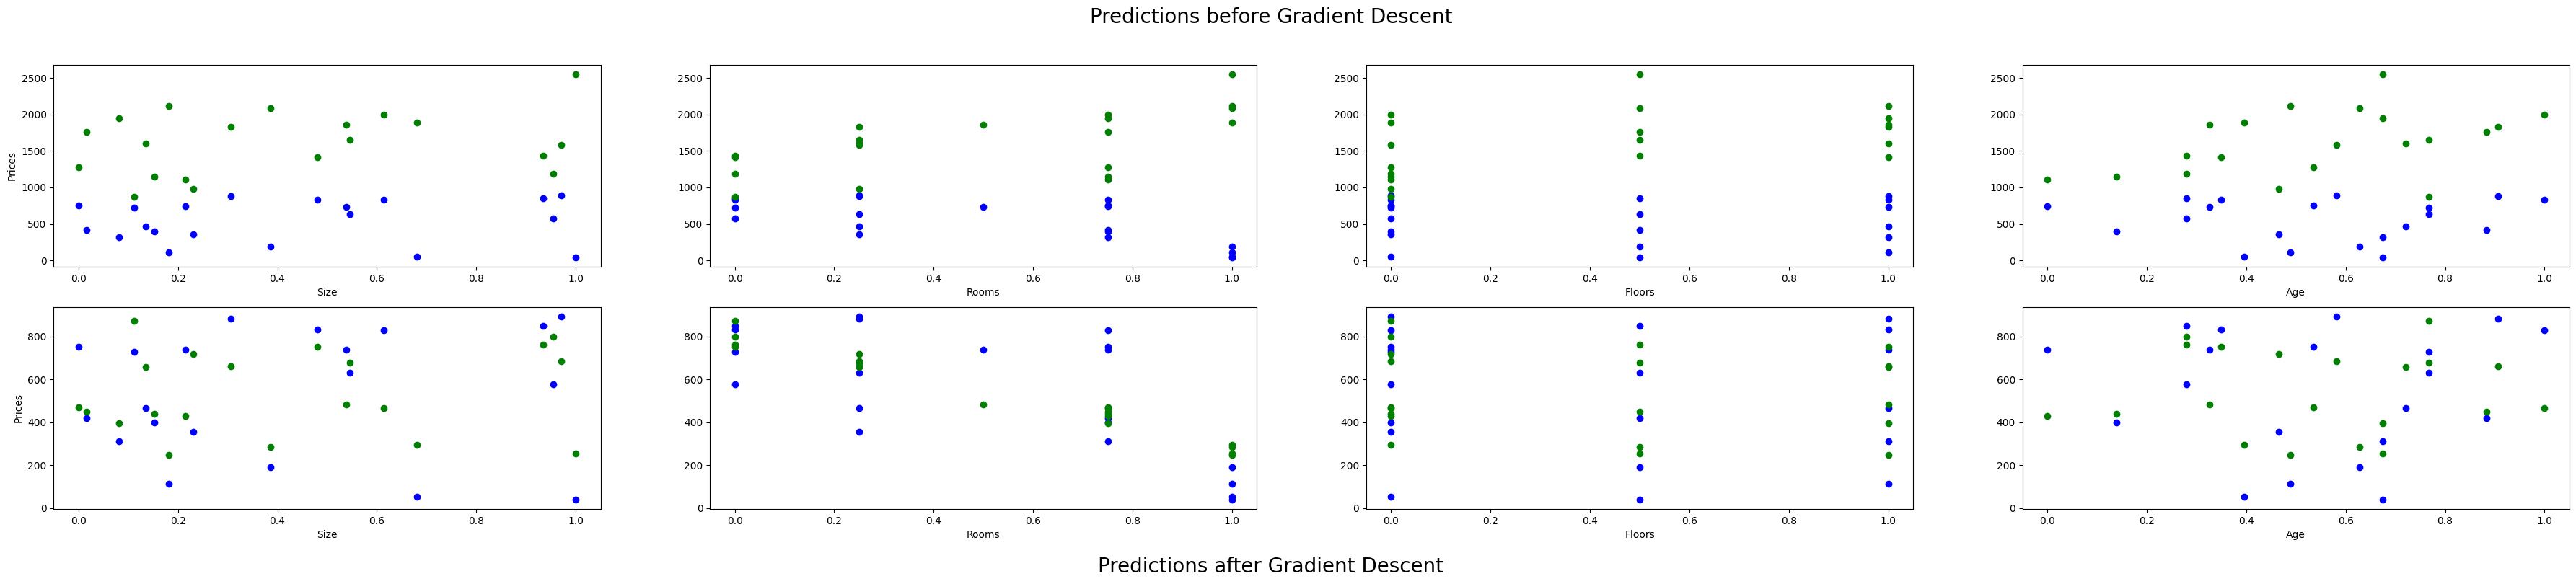

In [259]:
initialpredicts = multipleLR(nx_train, w, b)
finalpredicts = multipleLR(nx_train, aux_w, aux_b)
print(y_train)
print(initialpredicts.round(2))
print(finalpredicts.round(2))

fig, ax = plt.subplots(2, n, figsize=(45, 8))

for i in range(n):
    ax[0,i].scatter(nx_train[:,i],y_train,color="blue")
    ax[0,i].scatter(nx_train[:,i],initialpredicts,color="green")
    ax[1,i].scatter(nx_train[:,i],y_train,color="blue")
    ax[1,i].scatter(nx_train[:,i],finalpredicts,color="green")
    #for j in range(m):
    #    ax[0,i].annotate(f"P{j+1}",(nx_train[i,j],y_train[i]),ha='center')
    #    ax[0,i].annotate(f"Pr{j+1}",(nx_train[i,j],initialpredicts[i]),ha='center')
    #    ax[1,i].annotate(f"P{j+1}",(nx_train[i,j],y_train[i]),ha='center')
    #    ax[1,i].annotate(f"Pr{j+1}",(nx_train[i,j],finalpredicts[i]),ha='center')

for i in range(n):
    ax[0, i].set_xlabel(x_features[i])
    ax[1, i].set_xlabel(x_features[i])


# Establecer títulos para cada fila de la matriz
fig.suptitle("Predictions before Gradient Descent", fontsize=20)

# Establecer subtítulos para cada fila de la matriz
fig.text(0.5, 0, "Predictions after Gradient Descent", ha='center', fontsize=20)

ax[0, 0].set_ylabel("Prices")
ax[1, 0].set_ylabel("Prices")
plt.show()
